In [ ]:
#Main libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize': [15, 9]}, font_scale=1.3)

#Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

#Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

#Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

#Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# to suppress warnings
import warnings
warnings.filterwarnings("ignore")
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
df = pd.read_csv('Cancer.csv')

In [ ]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
df = pd.DataFrame(df)

In [ ]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
df.shape

(569, 32)

In [ ]:
column1_name = df.columns[0]
column2_name = df.columns[1]

# Swap the positions of the first two columns
df = df[[column2_name, column1_name] + list(df.columns[2:])]

In [ ]:
df.head()

,diagnosis,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   id                       569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.isnull().sum()

diagnosis                  0
id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
df.dtypes

diagnosis                   object
id                           int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


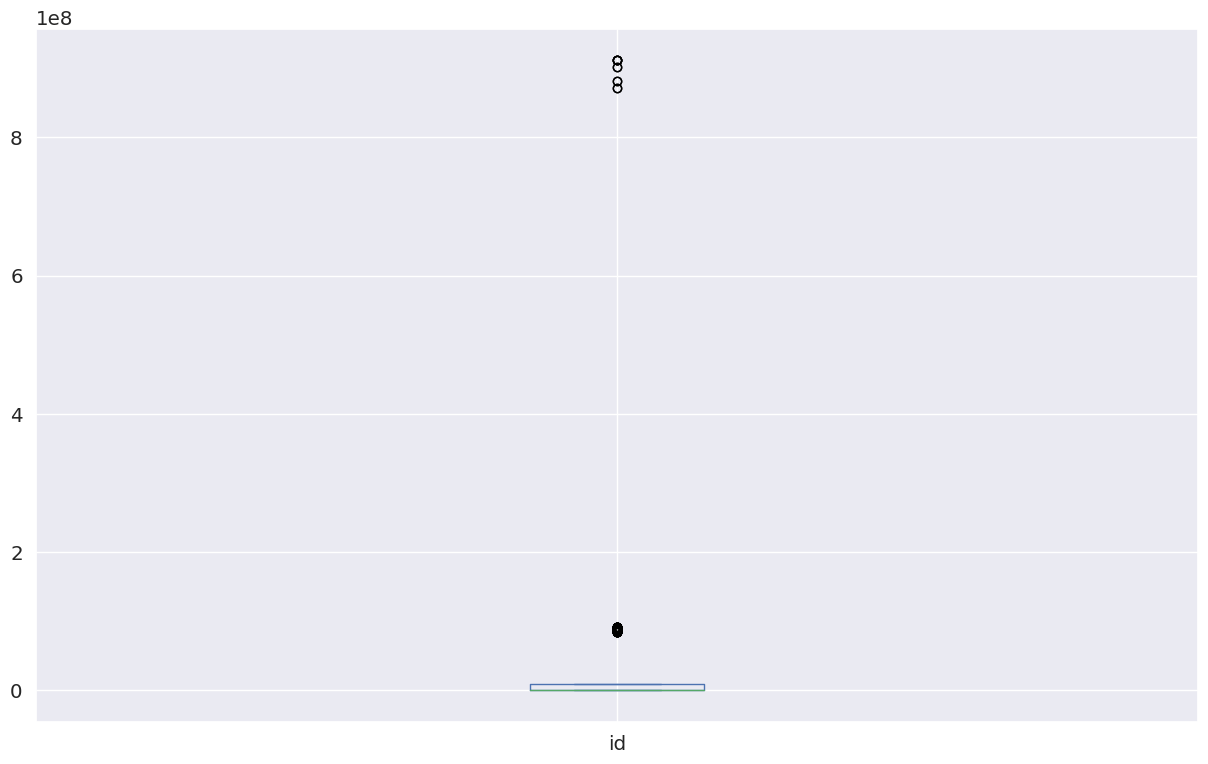

In [ ]:
df['id'].plot(kind='box')
plt.show()


In [ ]:
df['SQRT_id'] = df['id']**0.5

In [ ]:
print("The skewness of the original data is {}".format(df.id.skew()))
print('The skewness of the SQRT transformed data is {}'.format(df.SQRT_id.skew()))

The skewness of the original data is 6.473751801630769
The skewness of the SQRT transformed data is 3.9673401553656906


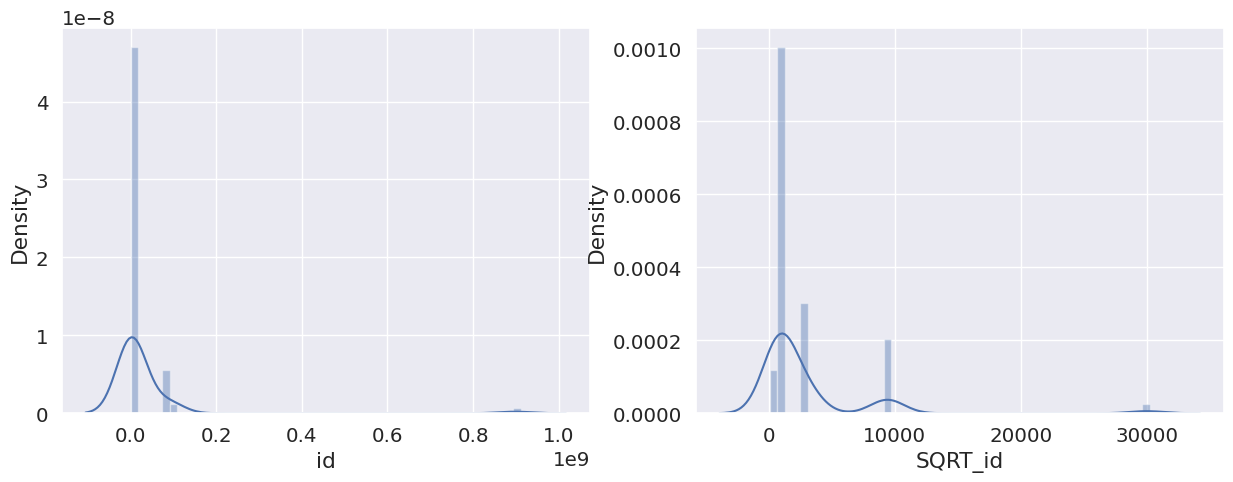

In [ ]:
fig,axes =plt.subplots(1,2,figsize=(15,5))
sns.distplot(df['id'],ax=axes[0])
sns.distplot(df['SQRT_id'],ax=axes[1])
plt.show()

In [ ]:
df['Log id'] = np.log(df['id'])

In [ ]:
print("The skewness of the original data is {}".format(df.id.skew()))
print('The skewness of the SQRT transformed data is {}'.format(df.SQRT_id.skew()))
print("The skewnss of the LOG transformed data is {}".format(df['Log id'].skew()))


The skewness of the original data is 6.473751801630769
The skewness of the SQRT transformed data is 3.9673401553656906
The skewnss of the LOG transformed data is 0.8159817343616511


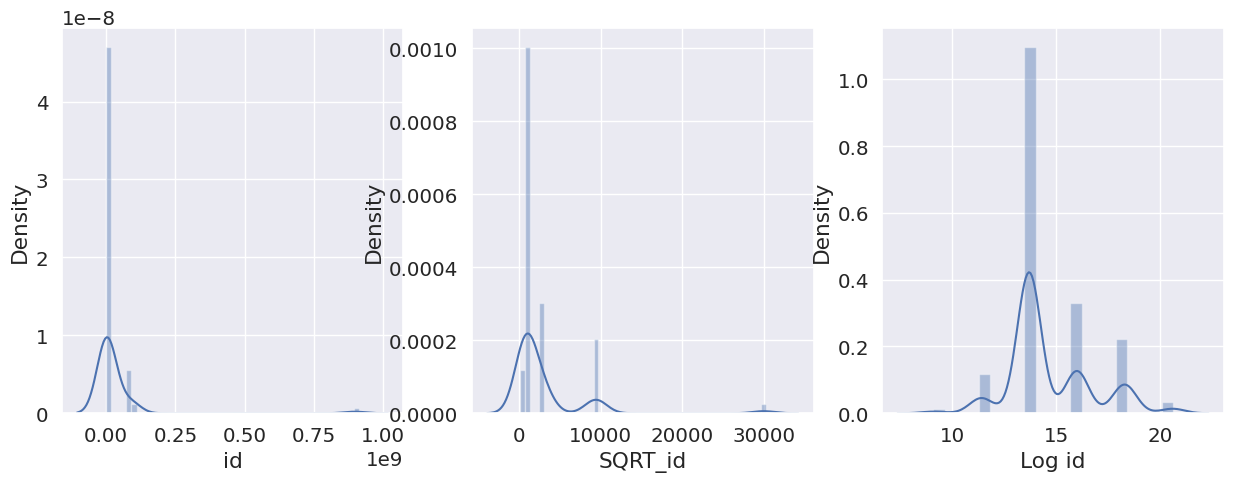

In [ ]:
fig, axes = plt.subplots(1,3,figsize=(15,5))

sns.distplot(df['id'], ax=axes[0])
sns.distplot(df['SQRT_id'], ax=axes[1])
sns.distplot(df['Log id'], ax=axes[2])

plt.show()

In [ ]:
Q1 = df.id.quantile(0.25)
Q2 = df.id.quantile(0.50)
Q3 = df.id.quantile(0.75)

# IQR : Inter-Quartile Range

IQR = Q3 - Q1

# Lower Limit:
LC = Q1 - (1.5*IQR)

# Upper Limit:
UC = Q3 + (1.5*IQR)

display(LC)
display(UC)

-11046648.5

20728995.5

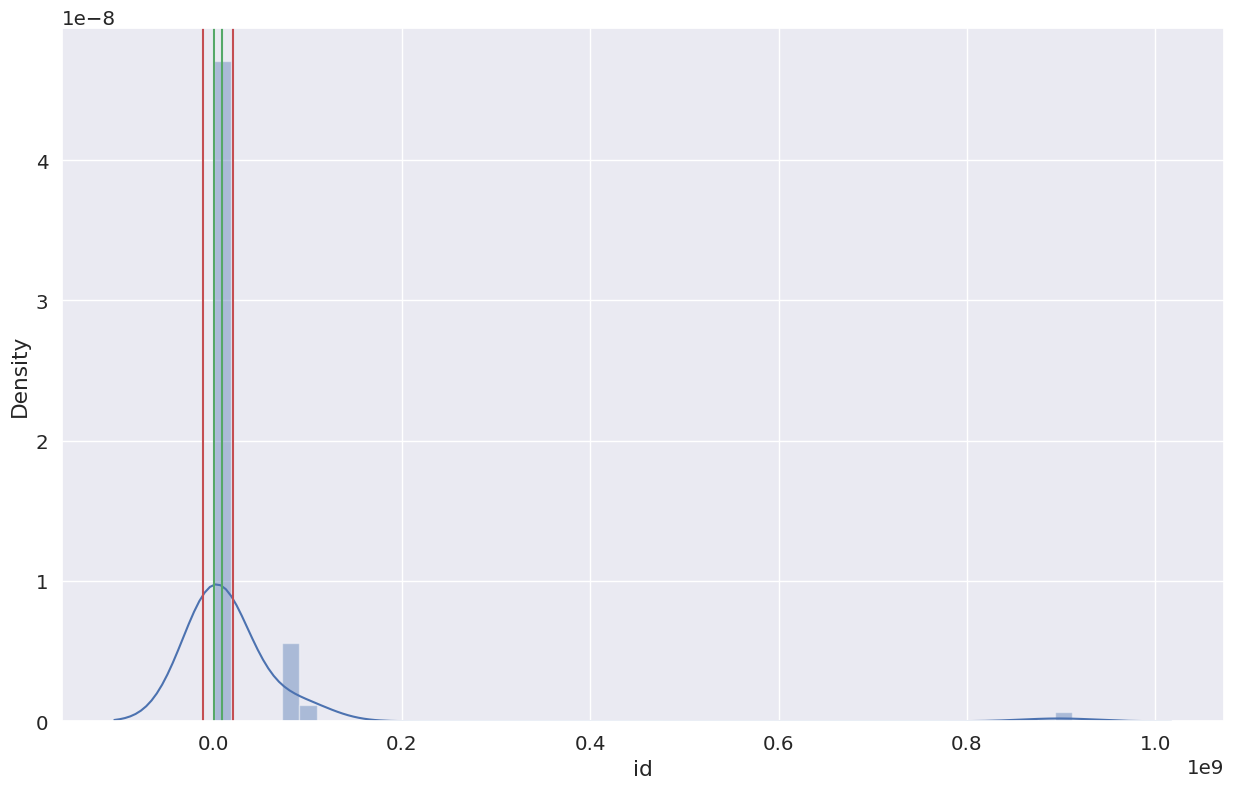

In [ ]:
sns.distplot(df.id)
plt.axvline(UC, color='r')
plt.axvline(LC, color ='r')
plt.axvline(Q1, color='g')
plt.axvline(Q3, color='g')
plt.show()

In [ ]:
df[(df.id<LC) | (df.id>UC)].reset_index(drop=True)

,diagnosis,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,SQRT_id,Log id
0,M,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,9181.552320,18.249903
1,M,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,9184.133111,18.250465
2,M,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,9184.683010,18.250585
3,M,84458202,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,9190.114363,18.251767
4,M,84501001,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,9192.442602,18.252274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,B,91813702,12.34,12.27,78.94,468.5,0.09003,0.06307,0.02958,0.02647,...,87.22,564.9,0.1292,0.2074,0.1791,0.10700,0.3110,0.07592,9581.946671,18.335272
77,B,91903901,11.67,20.02,75.21,416.2,0.10160,0.09453,0.04200,0.02157,...,87.00,550.6,0.1550,0.2964,0.2758,0.08120,0.3206,0.08950,9586.652231,18.336254
78,B,91903902,13.68,16.33,87.76,575.5,0.09277,0.07255,0.01752,0.01880,...,101.60,773.4,0.1264,0.1564,0.1206,0.08704,0.2806,0.07782,9586.652283,18.336254
79,M,91930402,20.47,20.67,134.70,1299.0,0.09156,0.13130,0.15230,0.10150,...,152.00,1645.0,0.1097,0.2534,0.3092,0.16130,0.3220,0.06386,9588.034314,18.336542


In [ ]:
df[(df.id<LC) | (df.id>UC)].shape[0]

81

In [ ]:
df = df[(df.id>LC) & (df.id<UC)]
df

,diagnosis,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,SQRT_id,Log id
0,M,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,917.770124,13.643894
1,M,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,917.887248,13.644149
5,M,843786,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440,918.578249,13.645654
6,M,844359,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,153.20,1606.0,0.14420,0.25760,0.3784,0.1932,0.3063,0.08368,918.890091,13.646333
8,M,844981,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,106.20,739.3,0.17030,0.54010,0.5390,0.2060,0.4378,0.10720,919.228481,13.647069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,962.509221,13.739087
565,M,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,962.643236,13.739366
566,M,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,962.784503,13.739659
567,M,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,962.933539,13.739969


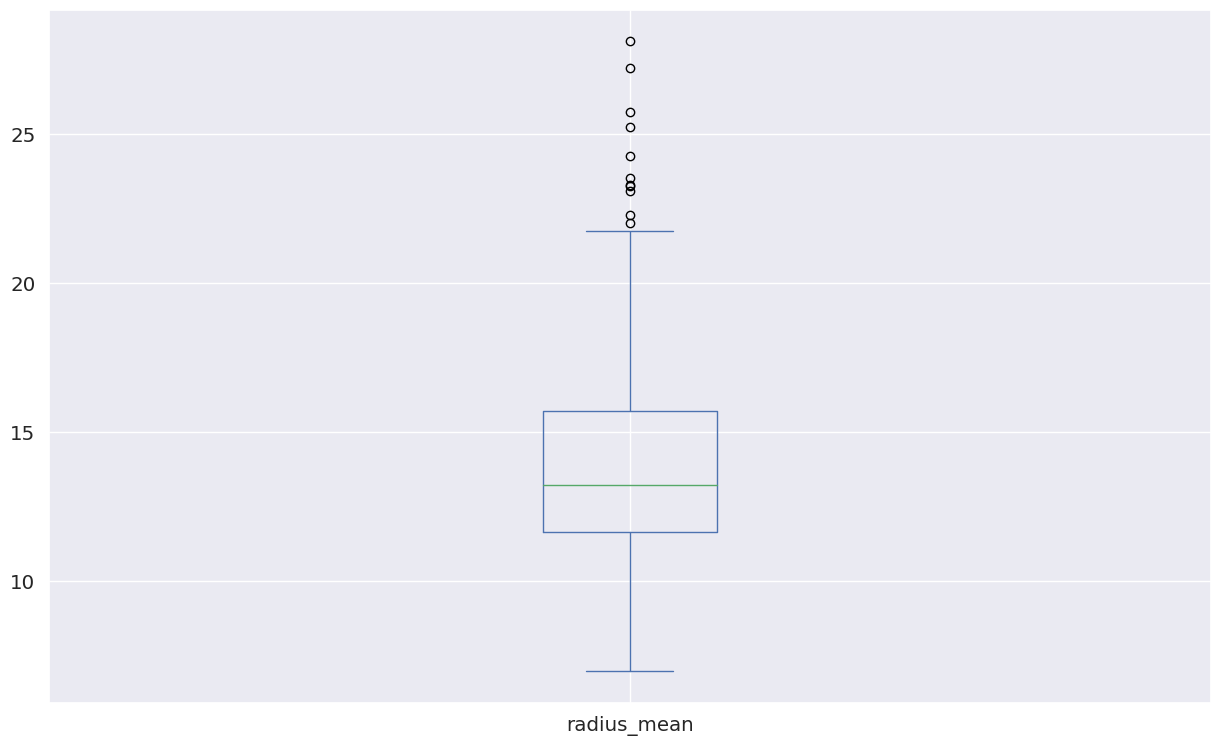

In [ ]:
df['radius_mean'].plot(kind='box')
plt.show()

In [ ]:
df['SQRT_radius'] = df['radius_mean']**0.5

In [ ]:
print("The skewness of the original data is {}".format(df.radius_mean.skew()))
print('The skewness of the SQRT transformed data is {}'.format(df.SQRT_radius.skew()))

The skewness of the original data is 0.9412766066660685
The skewness of the SQRT transformed data is 0.6254411093922756


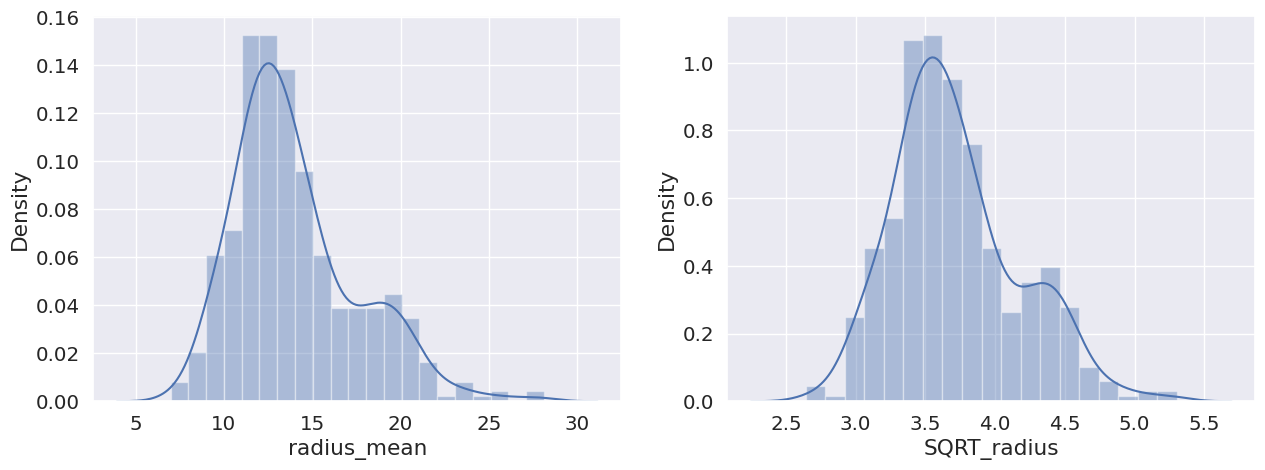

In [ ]:
fig,axes =plt.subplots(1,2,figsize=(15,5))
sns.distplot(df['radius_mean'],ax=axes[0])
sns.distplot(df['SQRT_radius'],ax=axes[1])
plt.show()

In [ ]:
df['Log radius'] = np.log(df['radius_mean'])

In [ ]:
print("The skewness of the original data is {}".format(df.radius_mean.skew()))
print('The skewness of the SQRT transformed data is {}'.format(df.SQRT_radius.skew()))
print("The skewnss of the LOG transformed data is {}".format(df['Log radius'].skew()))


The skewness of the original data is 0.9412766066660685
The skewness of the SQRT transformed data is 0.6254411093922756
The skewnss of the LOG transformed data is 0.3124431297263772


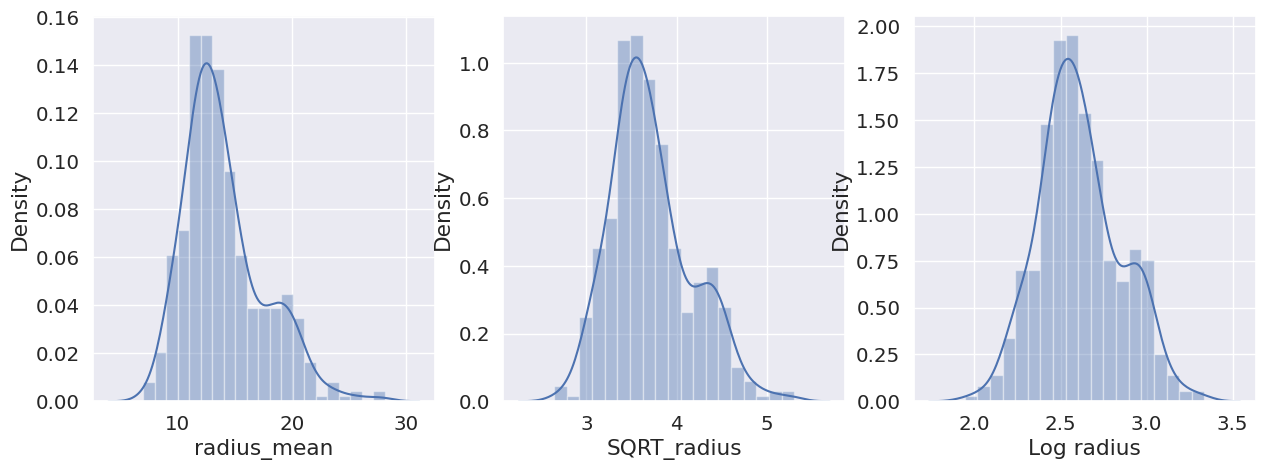

In [ ]:
fig, axes = plt.subplots(1,3,figsize=(15,5))

sns.distplot(df['radius_mean'], ax=axes[0])
sns.distplot(df['SQRT_radius'], ax=axes[1])
sns.distplot(df['Log radius'], ax=axes[2])

plt.show()

In [ ]:
Q11 = df.radius_mean.quantile(0.25)
Q22= df.radius_mean.quantile(0.50)
Q33 = df.radius_mean.quantile(0.75)

# IQR : Inter-Quartile Range

IQRR = Q33 - Q11

# Lower Limit:
LCC = Q11 - (1.5*IQRR)

# Upper Limit:
UCC = Q33 + (1.5*IQRR)

display(LCC)
display(UCC)

5.540000000000002

21.8

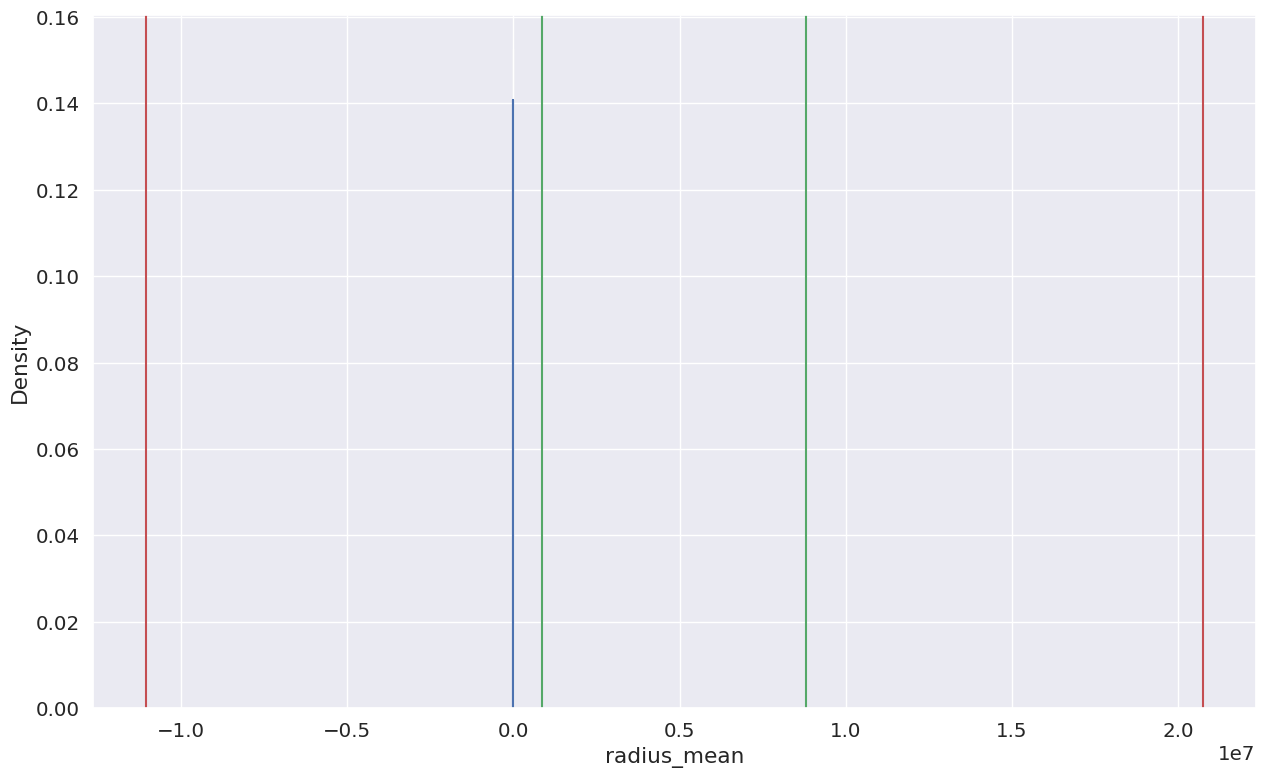

In [ ]:
sns.distplot(df.radius_mean)
plt.axvline(UC, color='r')
plt.axvline(LC, color ='r')
plt.axvline(Q1, color='g')
plt.axvline(Q3, color='g')
plt.show()

In [ ]:
df[(df.radius_mean<LC) | (df.radius_mean>UC)].reset_index(drop=True)

,diagnosis,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,SQRT_id,Log id,SQRT_radius,Log radius


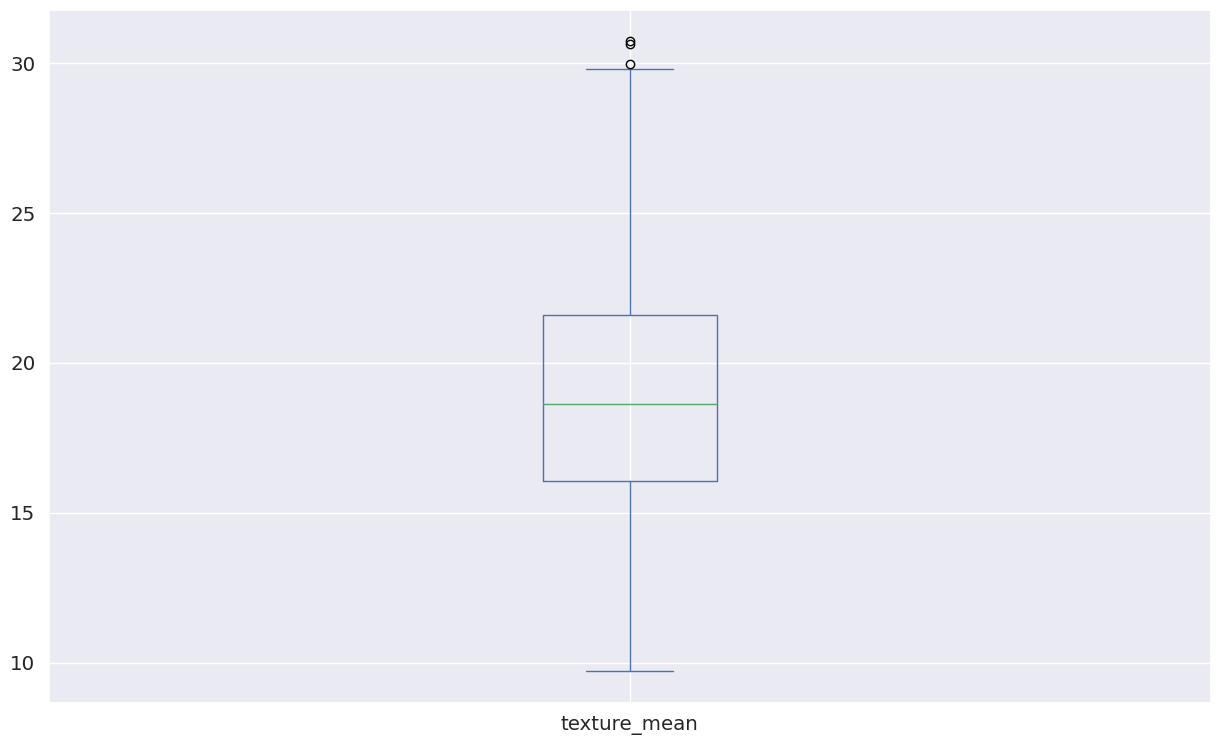

In [ ]:
df['texture_mean'].plot(kind='box')
plt.show()


In [ ]:
df['SQRT_texturemean'] = df['texture_mean']**0.5

In [ ]:
print("The skewness of the original data is {}".format(df.texture_mean.skew()))
print('The skewness of the SQRT transformed data is {}'.format(df.SQRT_texturemean.skew()))

The skewness of the original data is 0.4458116551596734
The skewness of the SQRT transformed data is 0.17603019438190015


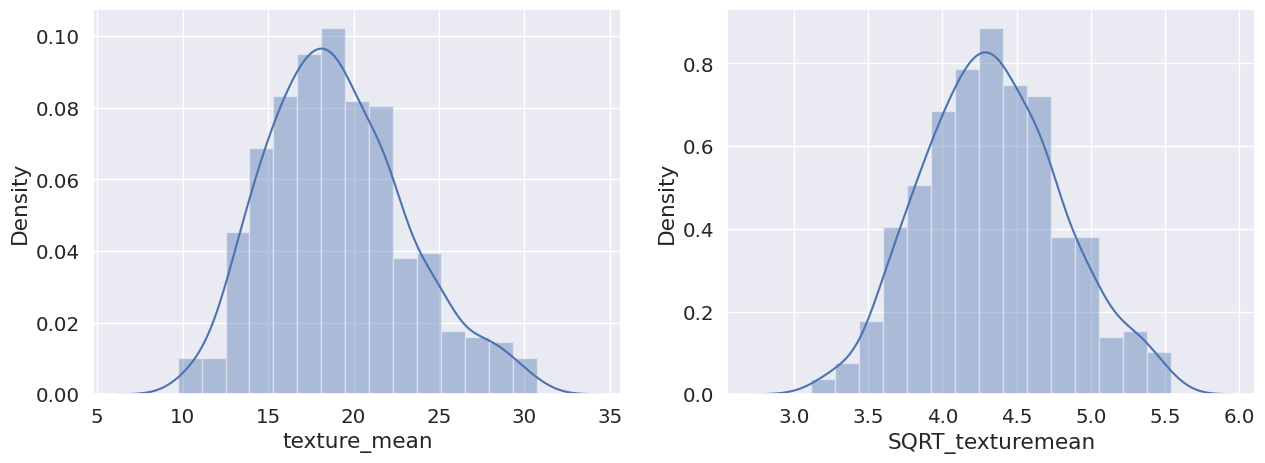

In [ ]:
fig,axes =plt.subplots(1,2,figsize=(15,5))
sns.distplot(df['texture_mean'],ax=axes[0])
sns.distplot(df['SQRT_texturemean'],ax=axes[1])
plt.show()

In [ ]:
df['Log texturemean'] = np.log(df['texture_mean'])

In [ ]:
print("The skewness of the original data is {}".format(df.texture_mean.skew()))
print('The skewness of the SQRT transformed data is {}'.format(df.SQRT_texturemean.skew()))
print("The skewnss of the LOG transformed data is {}".format(df['Log texturemean'].skew()))


The skewness of the original data is 0.4458116551596734
The skewness of the SQRT transformed data is 0.17603019438190015
The skewnss of the LOG transformed data is -0.10236218938969538


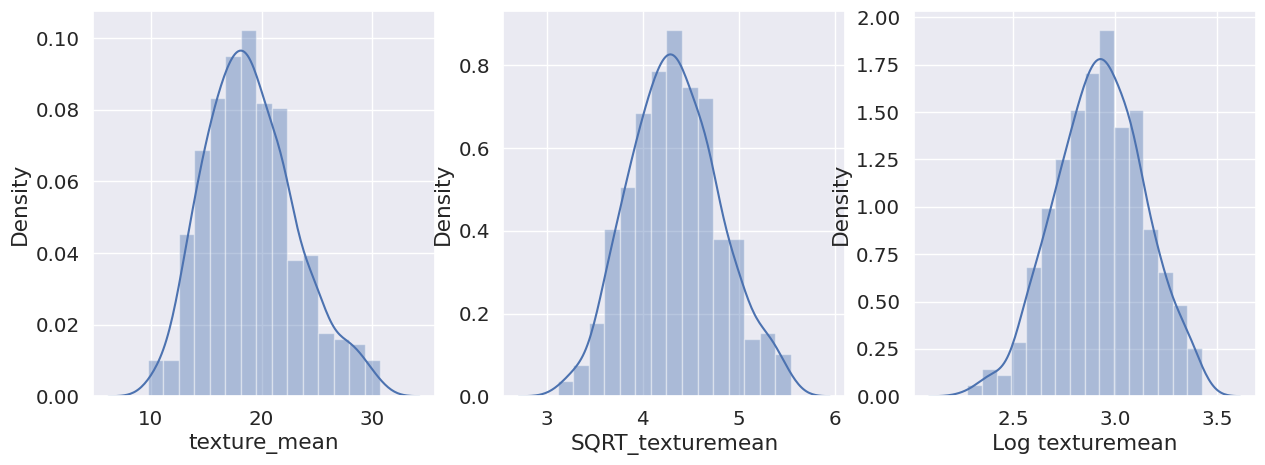

In [ ]:
fig, axes = plt.subplots(1,3,figsize=(15,5))

sns.distplot(df['texture_mean'], ax=axes[0])
sns.distplot(df['SQRT_texturemean'], ax=axes[1])
sns.distplot(df['Log texturemean'], ax=axes[2])

plt.show()

In [ ]:
Q1 = df.texture_mean.quantile(0.25)
Q2 = df.texture_mean.quantile(0.50)
Q3 = df.texture_mean.quantile(0.75)

# IQR : Inter-Quartile Range

IQR = Q3 - Q1

# Lower Limit:
LC = Q1 - (1.5*IQR)

# Upper Limit:
UC = Q3 + (1.5*IQR)

display(LC)
display(UC)

7.761250000000004

29.89125

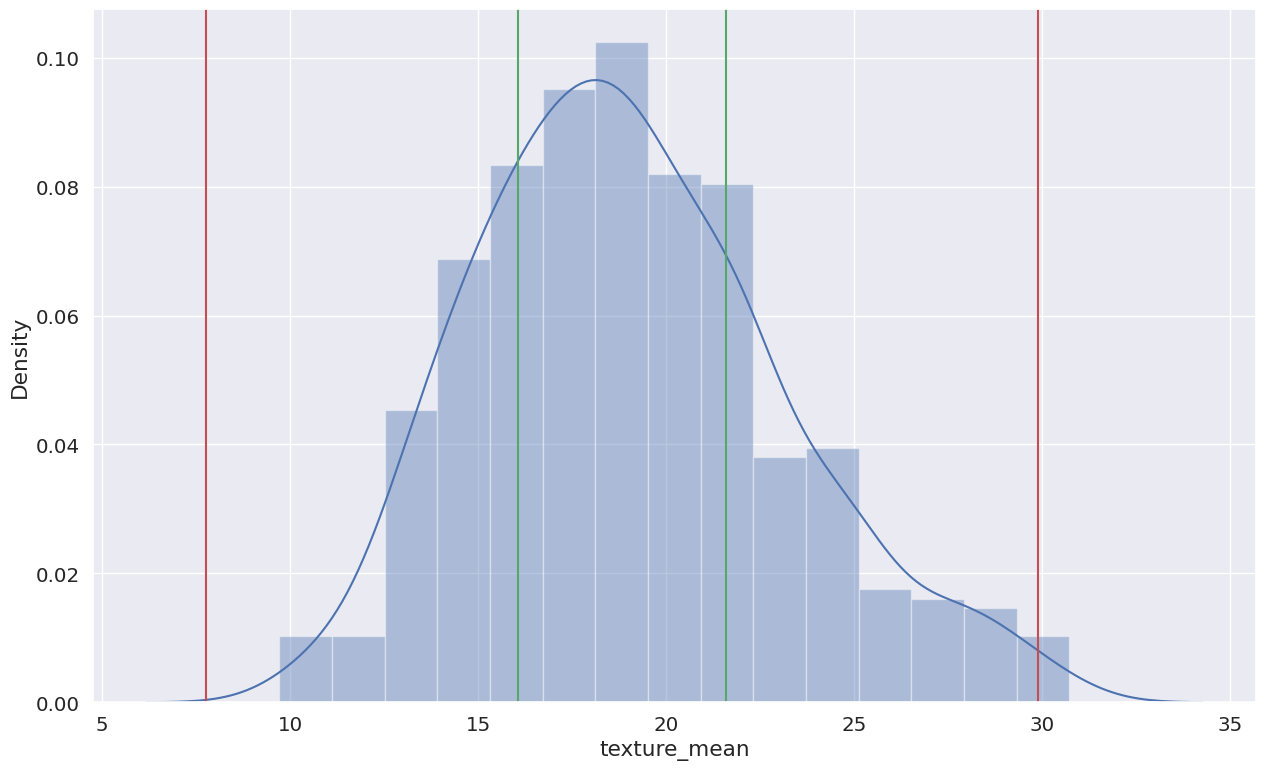

In [ ]:
sns.distplot(df.texture_mean)
plt.axvline(UC, color='r')
plt.axvline(LC, color ='r')
plt.axvline(Q1, color='g')
plt.axvline(Q3, color='g')
plt.show()

In [ ]:
df[(df.texture_mean<LC) | (df.texture_mean>UC)].reset_index(drop=True)

,diagnosis,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,SQRT_id,Log id,SQRT_radius,Log radius,SQRT_texturemean,Log texturemean
0,B,9112085,13.38,30.72,86.34,557.2,0.09245,0.07426,0.02819,0.03264,...,0.07003,0.07763,0.2196,0.07675,3018.623030,16.025112,3.657868,2.593761,5.542563,3.424914
1,B,9113846,12.27,29.97,77.42,465.4,0.07699,0.03398,0.00000,0.00000,...,0.00000,0.00000,0.2409,0.06743,3018.914706,16.025305,3.502856,2.507157,5.474486,3.400197
2,M,925622,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,...,1.17000,0.23560,0.4089,0.14090,962.092511,13.738221,3.901282,2.722610,5.533534,3.421653


In [ ]:
df[(df.texture_mean<LC) | (df.texture_mean>UC)].shape[0]

3

In [ ]:
df = df[(df.texture_mean>LC) & (df.texture_mean<UC)]
df

,diagnosis,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,SQRT_id,Log id,SQRT_radius,Log radius,SQRT_texturemean,Log texturemean
0,M,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,0.7119,0.2654,0.4601,0.11890,917.770124,13.643894,4.241462,2.889816,3.221801,2.339881
1,M,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,0.2416,0.1860,0.2750,0.08902,917.887248,13.644149,4.535416,3.023834,4.215448,2.877512
5,M,843786,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,0.5355,0.1741,0.3985,0.12440,918.578249,13.645654,3.528456,2.521721,3.962323,2.753661
6,M,844359,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,0.3784,0.1932,0.3063,0.08368,918.890091,13.646333,4.272002,2.904165,4.469899,2.994732
8,M,844981,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,0.5390,0.2060,0.4378,0.10720,919.228481,13.647069,3.605551,2.564949,4.671188,3.082827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,0.4107,0.2216,0.2060,0.07115,962.509221,13.739087,4.643275,3.070840,4.731807,3.108614
565,M,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,0.3215,0.1628,0.2572,0.06637,962.643236,13.739366,4.486647,3.002211,5.315073,3.341093
566,M,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,0.3403,0.1418,0.2218,0.07820,962.784503,13.739659,4.074310,2.809403,5.299057,3.335058
567,M,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,0.9387,0.2650,0.4087,0.12400,962.933539,13.739969,4.538722,3.025291,5.415718,3.378611


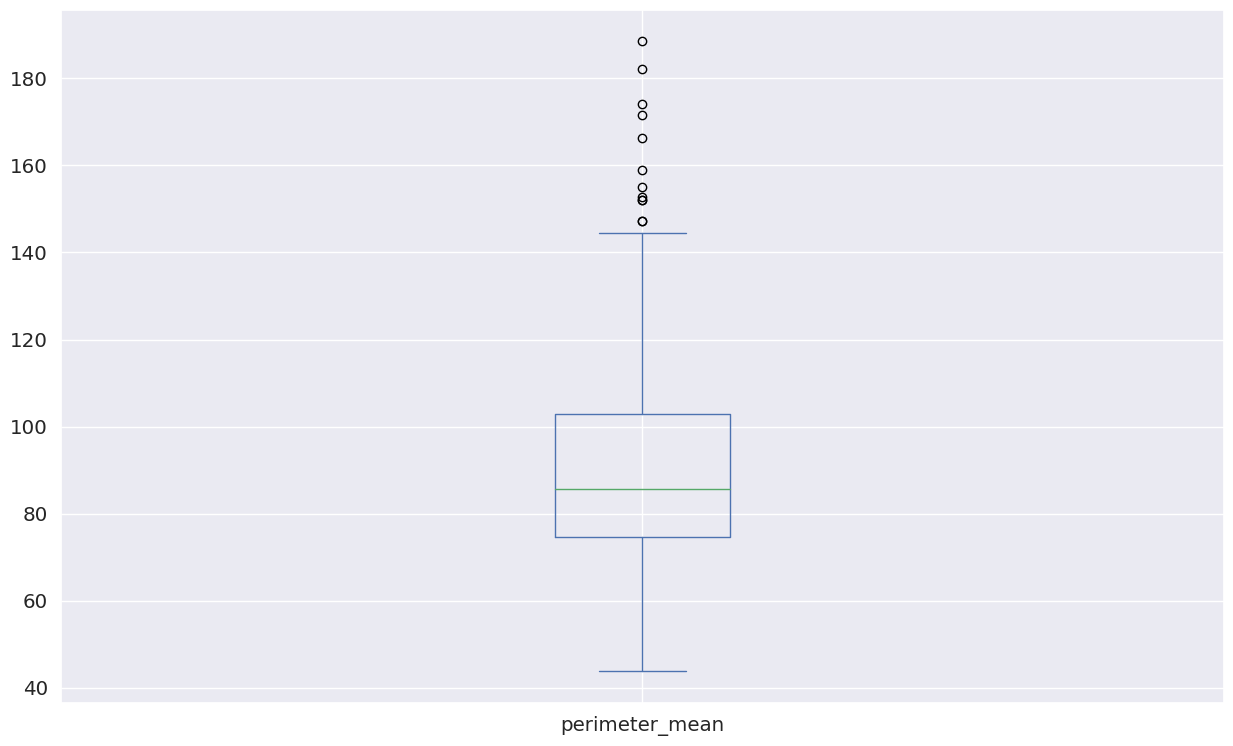

In [ ]:
df['perimeter_mean'].plot(kind='box')
plt.show()

In [ ]:
df['SQRT_perimeter_mean'] = df['perimeter_mean']**0.5

In [ ]:
print("The skewness of the original data is {}".format(df.perimeter_mean.skew()))
print('The skewness of the SQRT transformed data is {}'.format(df.SQRT_perimeter_mean.skew()))

The skewness of the original data is 0.9886751597953841
The skewness of the SQRT transformed data is 0.6574538555360299


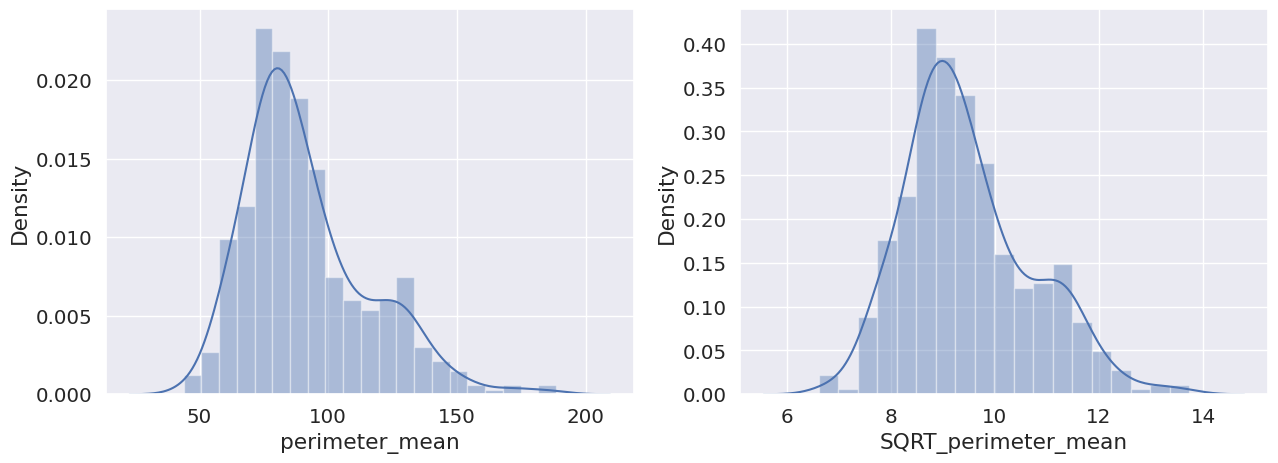

In [ ]:
fig,axes =plt.subplots(1,2,figsize=(15,5))
sns.distplot(df['perimeter_mean'],ax=axes[0])
sns.distplot(df['SQRT_perimeter_mean'],ax=axes[1])
plt.show()

In [ ]:
df['Log perimetermean'] = np.log(df['perimeter_mean'])

In [ ]:
print("The skewness of the original data is {}".format(df.perimeter_mean.skew()))
print('The skewness of the SQRT transformed data is {}'.format(df.SQRT_perimeter_mean.skew()))
print("The skewnss of the LOG transformed data is {}".format(df['Log perimetermean'].skew()))


The skewness of the original data is 0.9886751597953841
The skewness of the SQRT transformed data is 0.6574538555360299
The skewnss of the LOG transformed data is 0.3299332345281687


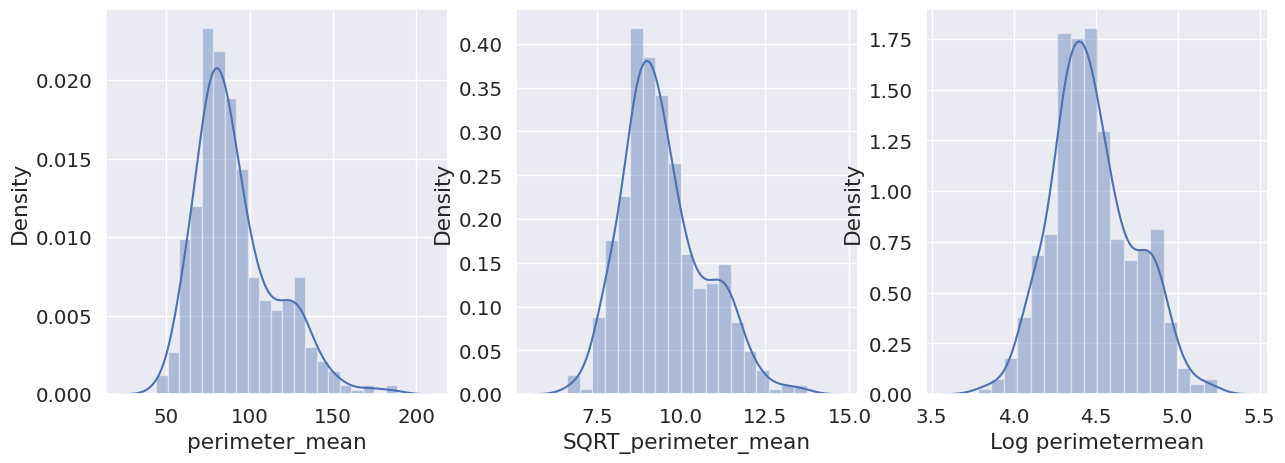

In [ ]:
fig, axes = plt.subplots(1,3,figsize=(15,5))

sns.distplot(df['perimeter_mean'], ax=axes[0])
sns.distplot(df['SQRT_perimeter_mean'], ax=axes[1])
sns.distplot(df['Log perimetermean'], ax=axes[2])

plt.show()

In [ ]:
Q11 = df.perimeter_mean.quantile(0.25)
Q22= df.perimeter_mean.quantile(0.50)
Q33 = df.perimeter_mean.quantile(0.75)

# IQR : Inter-Quartile Range

IQRR = Q33 - Q11

# Lower Limit:
LCC = Q11 - (1.5*IQRR)

# Upper Limit:
UCC = Q33 + (1.5*IQRR)

display(LCC)
display(UCC)

32.42500000000002

145.02499999999998

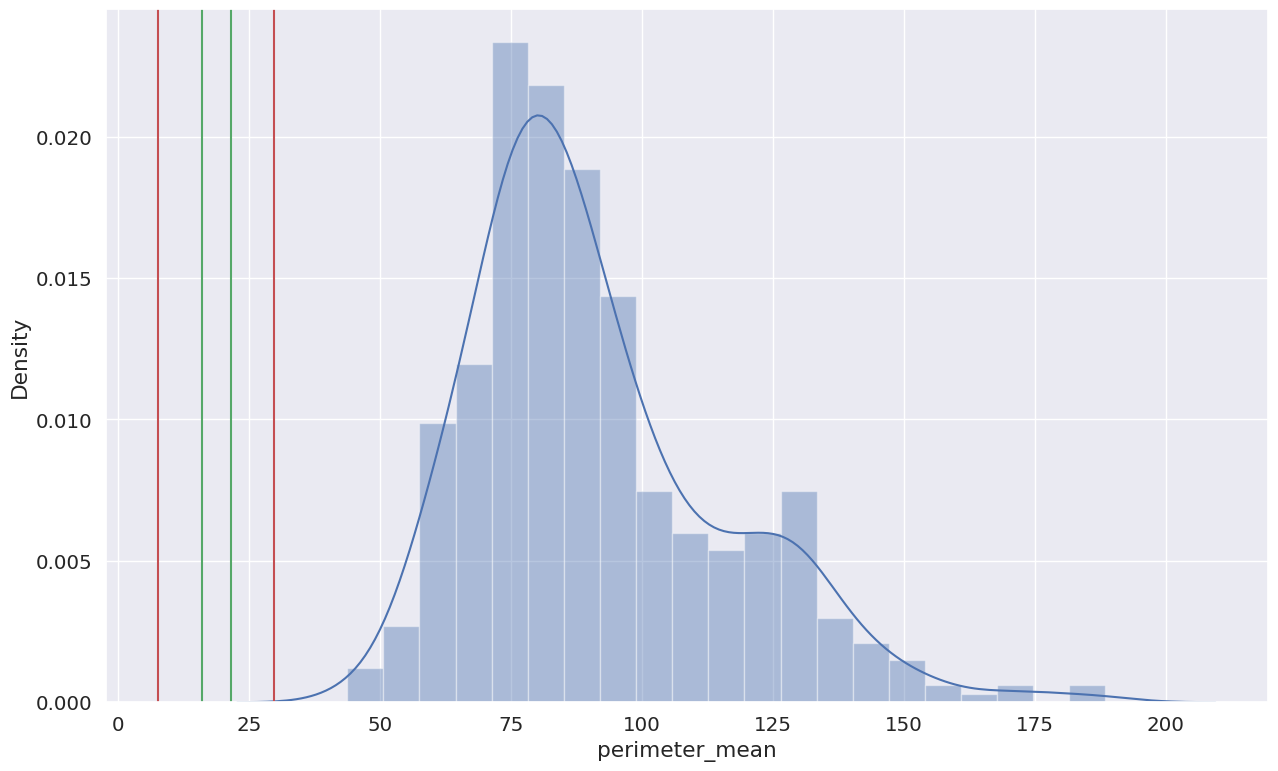

In [ ]:
sns.distplot(df.perimeter_mean)
plt.axvline(UC, color='r')
plt.axvline(LC, color ='r')
plt.axvline(Q1, color='g')
plt.axvline(Q3, color='g')
plt.show()

In [ ]:
df[(df.perimeter_mean<LC) | (df.perimeter_mean>UC)].reset_index(drop=True)
#can  not drop them because they almost the whole data

,diagnosis,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,symmetry_worst,fractal_dimension_worst,SQRT_id,Log id,SQRT_radius,Log radius,SQRT_texturemean,Log texturemean,SQRT_perimeter_mean,Log perimetermean
0,M,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,0.4601,0.11890,917.770124,13.643894,4.241462,2.889816,3.221801,2.339881,11.081516,4.810557
1,M,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,0.2750,0.08902,917.887248,13.644149,4.535416,3.023834,4.215448,2.877512,11.528226,4.889597
2,M,843786,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,0.3985,0.12440,918.578249,13.645654,3.528456,2.521721,3.962323,2.753661,9.086804,4.413646
3,M,844359,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,0.3063,0.08368,918.890091,13.646333,4.272002,2.904165,4.469899,2.994732,10.936178,4.784153
4,M,844981,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,0.4378,0.10720,919.228481,13.647069,3.605551,2.564949,4.671188,3.082827,9.354143,4.471639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,M,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,0.2060,0.07115,962.509221,13.739087,4.643275,3.070840,4.731807,3.108614,11.916375,4.955827
481,M,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,0.2572,0.06637,962.643236,13.739366,4.486647,3.002211,5.315073,3.341093,11.454257,4.876723
482,M,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,0.2218,0.07820,962.784503,13.739659,4.074310,2.809403,5.299057,3.335058,10.406729,4.684905
483,M,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,0.4087,0.12400,962.933539,13.739969,4.538722,3.025291,5.415718,3.378611,11.836385,4.942356


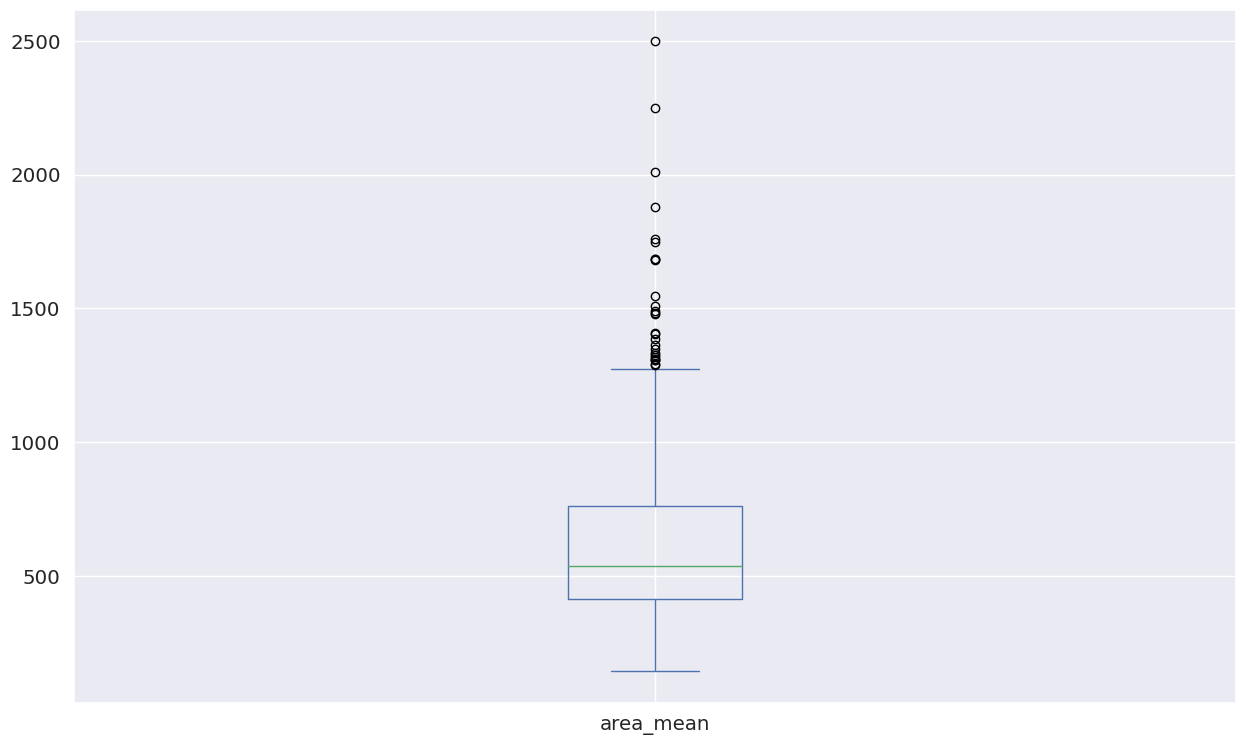

In [ ]:
df['area_mean'].plot(kind='box')
plt.show()


In [ ]:
df['SQRT_areamean'] = df['area_mean']**0.5

In [ ]:
print("The skewness of the original data is {}".format(df.area_mean.skew()))
print('The skewness of the SQRT transformed data is {}'.format(df.SQRT_areamean.skew()))

The skewness of the original data is 1.591890516282249
The skewness of the SQRT transformed data is 0.9139965623531499


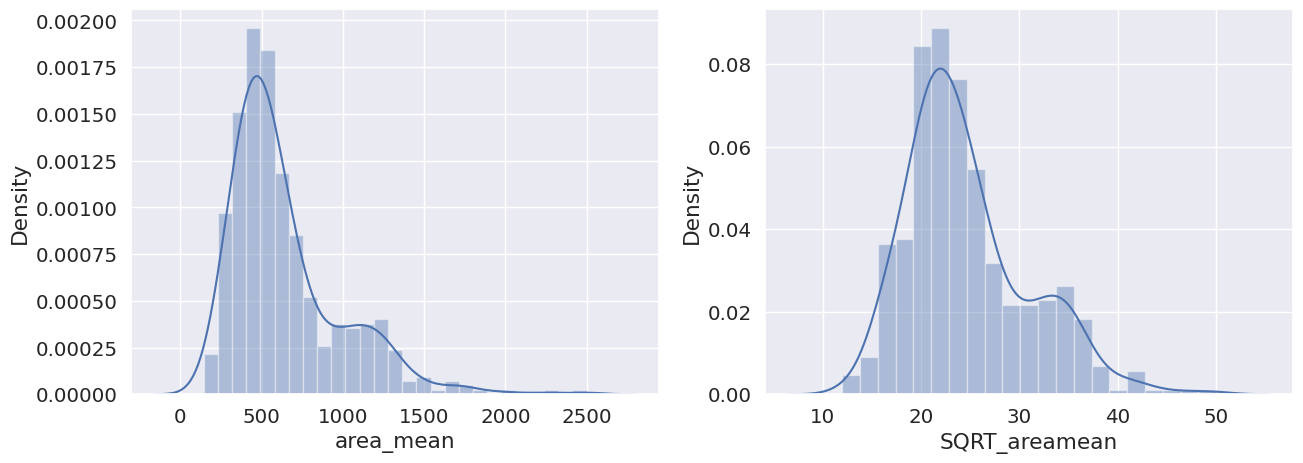

In [ ]:
fig,axes =plt.subplots(1,2,figsize=(15,5))
sns.distplot(df['area_mean'],ax=axes[0])
sns.distplot(df['SQRT_areamean'],ax=axes[1])
plt.show()

In [ ]:
df['Log areamean'] = np.log(df['area_mean'])

In [ ]:
print("The skewness of the original data is {}".format(df.area_mean.skew()))
print('The skewness of the SQRT transformed data is {}'.format(df.SQRT_areamean.skew()))
print("The skewnss of the LOG transformed data is {}".format(df['Log areamean'].skew()))


The skewness of the original data is 1.591890516282249
The skewness of the SQRT transformed data is 0.9139965623531499
The skewnss of the LOG transformed data is 0.28470111321071334


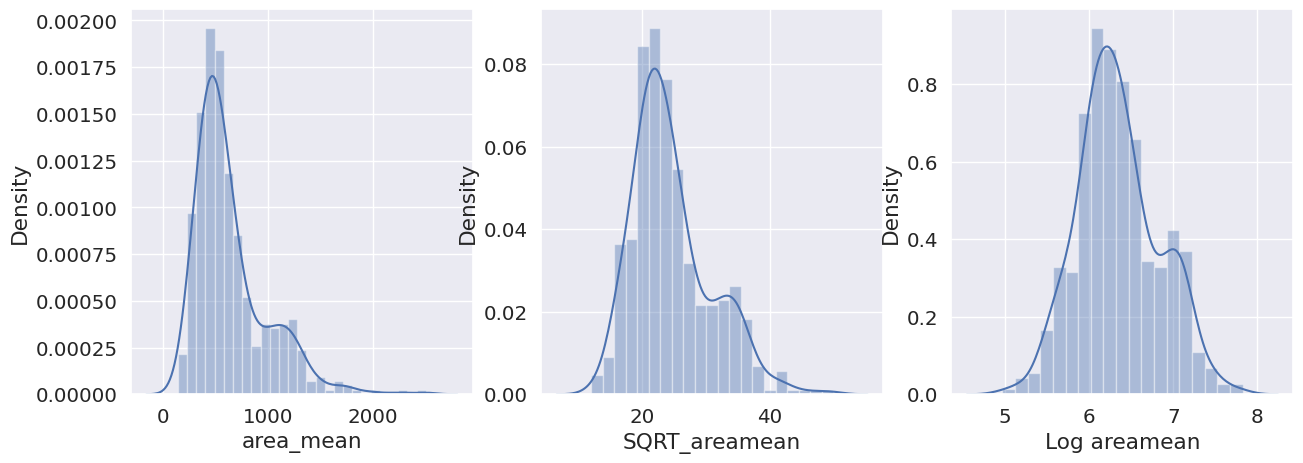

In [ ]:
fig, axes = plt.subplots(1,3,figsize=(15,5))

sns.distplot(df['area_mean'], ax=axes[0])
sns.distplot(df['SQRT_areamean'], ax=axes[1])
sns.distplot(df['Log areamean'], ax=axes[2])

plt.show()

In [ ]:
Q1 = df.area_mean.quantile(0.25)
Q2 = df.area_mean.quantile(0.50)
Q3 = df.area_mean.quantile(0.75)

# IQR : Inter-Quartile Range

IQR = Q3 - Q1

# Lower Limit:
LC = Q1 - (1.5*IQR)

# Upper Limit:
UC = Q3 + (1.5*IQR)

display(LC)
display(UC)

-110.44999999999993

1284.35

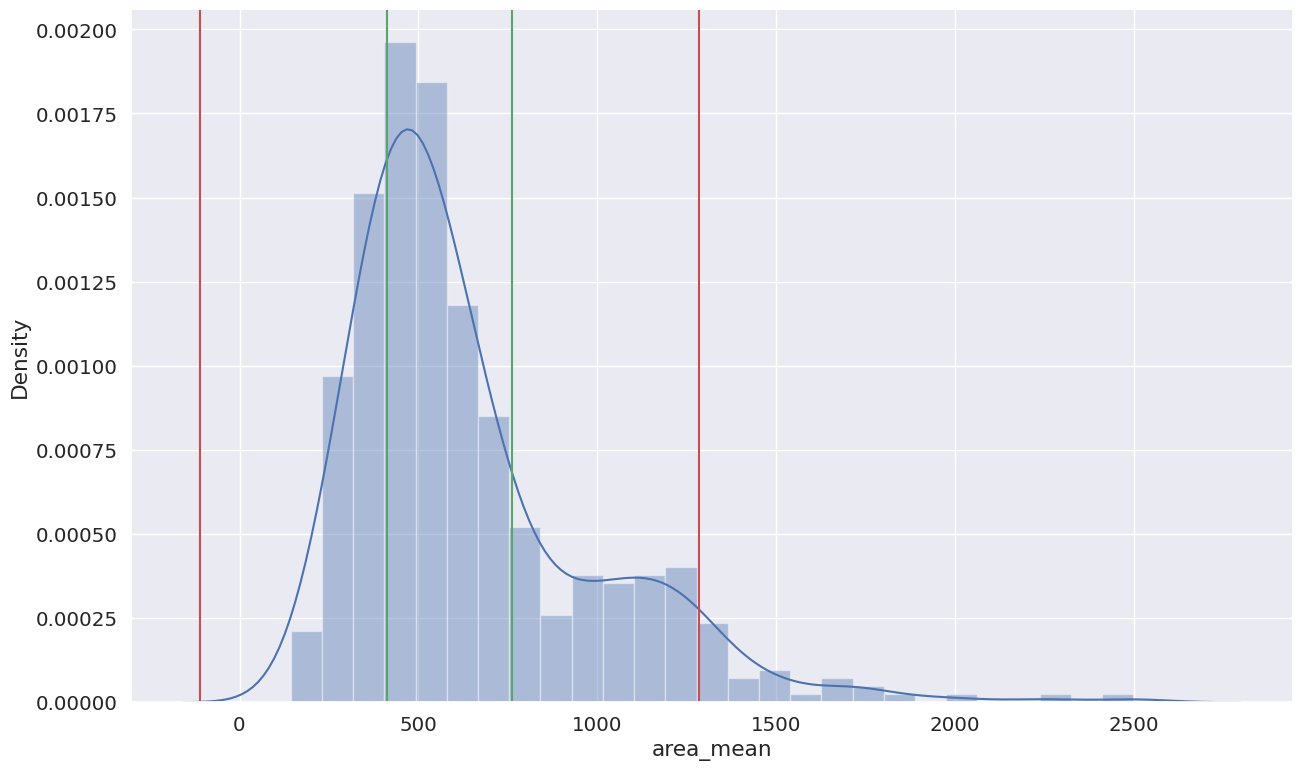

In [ ]:
sns.distplot(df.area_mean)
plt.axvline(UC, color='r')
plt.axvline(LC, color ='r')
plt.axvline(Q1, color='g')
plt.axvline(Q3, color='g')
plt.show()

In [ ]:
df[(df.area_mean<LC) | (df.area_mean>UC)].reset_index(drop=True)

,diagnosis,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,SQRT_id,Log id,SQRT_radius,Log radius,SQRT_texturemean,Log texturemean,SQRT_perimeter_mean,Log perimetermean,SQRT_areamean,Log areamean
0,M,842517,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.08690,0.07017,...,917.887248,13.644149,4.535416,3.023834,4.215448,2.877512,11.528226,4.889597,36.414283,7.189922
1,M,851509,21.16,23.04,137.2,1404.0,0.09428,0.10220,0.10970,0.08632,...,922.772453,13.654765,4.600000,3.052113,4.800000,3.137232,11.713240,4.921440,37.469988,7.247081
2,M,8611555,25.22,24.91,171.5,1878.0,0.10630,0.26650,0.33390,0.18450,...,2934.545110,15.968615,5.021952,3.227637,4.990992,3.215269,13.095801,5.144583,43.335897,7.537963
3,M,86355,22.27,19.67,152.8,1509.0,0.13260,0.27680,0.42640,0.18230,...,293.862213,11.366222,4.719110,3.103240,4.435087,2.979095,12.361230,5.029130,38.845849,7.319202
4,M,865423,24.25,20.20,166.2,1761.0,0.14470,0.28670,0.42680,0.20120,...,930.281140,13.670974,4.924429,3.188417,4.494441,3.005683,12.891858,5.113192,41.964271,7.473637
5,M,8712289,23.27,22.04,152.1,1686.0,0.08439,0.11450,0.13240,0.09702,...,2951.658686,15.980245,4.823899,3.147165,4.694678,3.092859,12.332883,5.024538,41.060930,7.430114
6,M,873592,27.22,21.87,182.1,2250.0,0.10940,0.19140,0.28710,0.18780,...,934.661436,13.680369,5.217279,3.303952,4.676537,3.085116,13.494443,5.204556,47.434165,7.718685
7,M,873593,21.09,26.57,142.7,1311.0,0.11410,0.28320,0.24870,0.14960,...,934.661971,13.680370,4.592385,3.048799,5.154610,3.279783,11.945711,4.960745,36.207734,7.178545
8,M,878796,23.29,26.67,158.9,1685.0,0.11410,0.20840,0.35230,0.16200,...,937.441198,13.686308,4.825971,3.148024,5.164301,3.283539,12.605554,5.068275,41.048752,7.429521
9,M,8810703,28.11,18.47,188.5,2499.0,0.11420,0.15160,0.32010,0.15950,...,2968.282837,15.991478,5.301886,3.336125,4.297674,2.916148,13.729530,5.239098,49.989999,7.823646


In [ ]:
df = df[(df.area_mean>LC) & (df.area_mean<UC)]
df

,diagnosis,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,SQRT_id,Log id,SQRT_radius,Log radius,SQRT_texturemean,Log texturemean,SQRT_perimeter_mean,Log perimetermean,SQRT_areamean,Log areamean
0,M,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,917.770124,13.643894,4.241462,2.889816,3.221801,2.339881,11.081516,4.810557,31.638584,6.908755
5,M,843786,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,918.578249,13.645654,3.528456,2.521721,3.962323,2.753661,9.086804,4.413646,21.842619,6.167726
6,M,844359,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,918.890091,13.646333,4.272002,2.904165,4.469899,2.994732,10.936178,4.784153,32.249031,6.946976
8,M,844981,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,919.228481,13.647069,3.605551,2.564949,4.671188,3.082827,9.354143,4.471639,22.799123,6.253444
10,M,845636,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,...,919.584689,13.647844,4.002499,2.773838,4.820788,3.145875,10.134101,4.631812,28.245354,6.681858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,B,925311,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,...,961.930871,13.737885,3.346640,2.415914,5.419410,3.379974,8.406545,4.258021,19.646883,5.955837
565,M,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,962.643236,13.739366,4.486647,3.002211,5.315073,3.341093,11.454257,4.876723,35.510562,7.139660
566,M,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,962.784503,13.739659,4.074310,2.809403,5.299057,3.335058,10.406729,4.684905,29.293344,6.754721
567,M,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,962.933539,13.739969,4.538722,3.025291,5.415718,3.378611,11.836385,4.942356,35.566838,7.142827


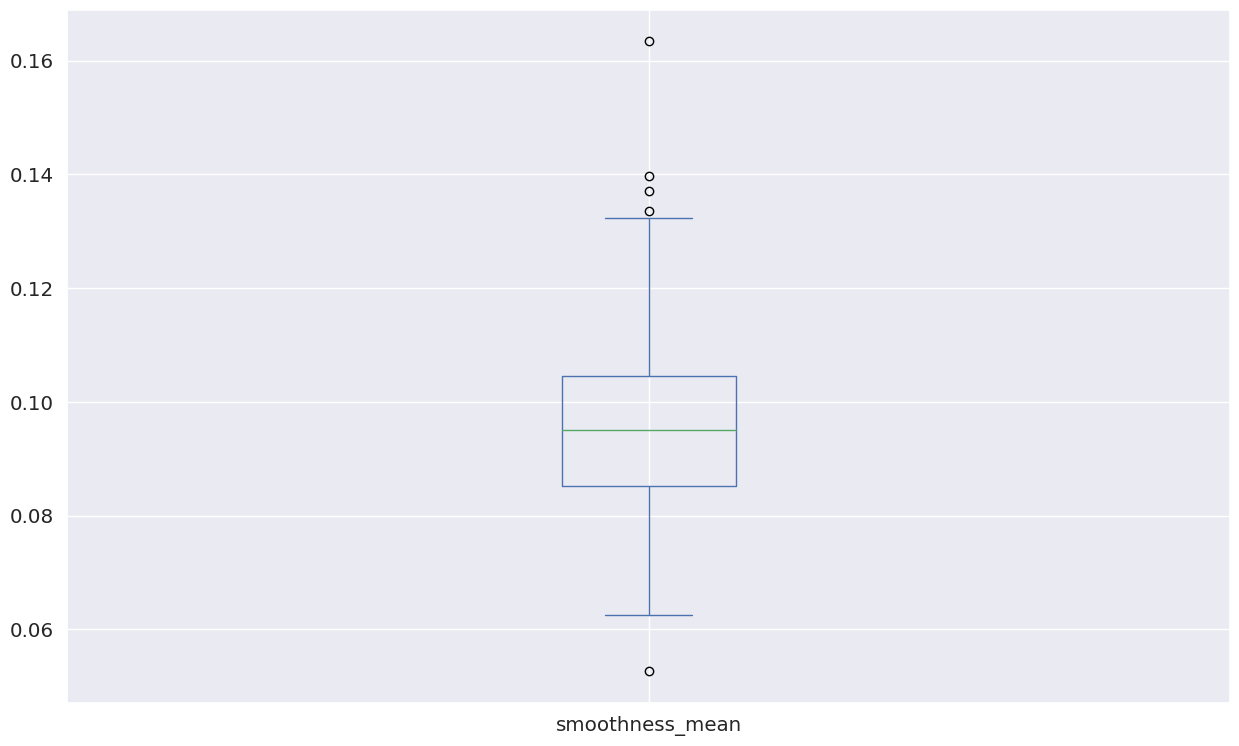

In [ ]:
df['smoothness_mean'].plot(kind='box')
plt.show()

In [ ]:
df['SQRT_smoothness_mean'] = df['smoothness_mean']**0.5

In [ ]:
print("The skewness of the original data is {}".format(df.smoothness_mean.skew()))
print('The skewness of the SQRT transformed data is {}'.format(df.SQRT_smoothness_mean.skew()))

The skewness of the original data is 0.46179047678682816
The skewness of the SQRT transformed data is 0.1898131151348368


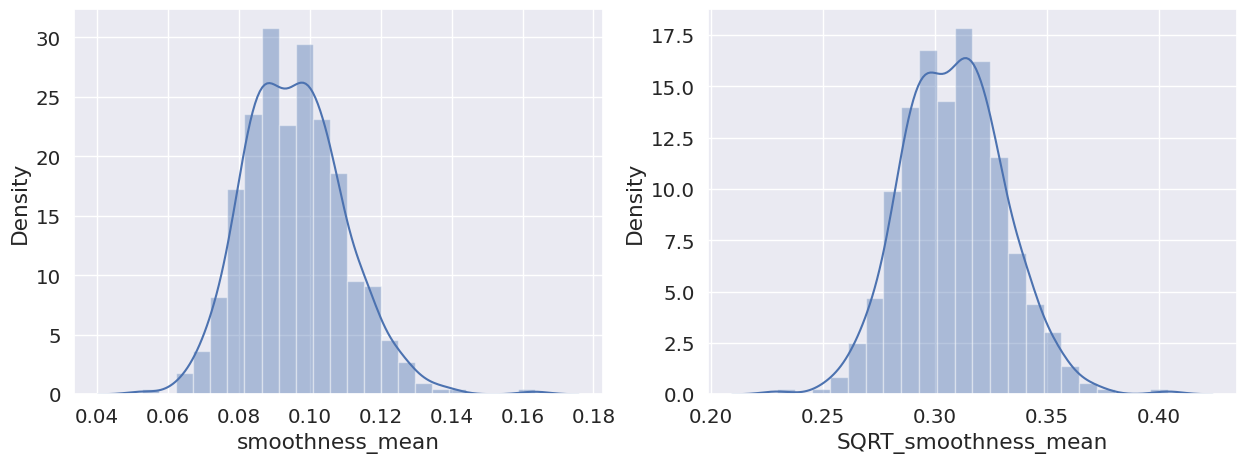

In [ ]:
fig,axes =plt.subplots(1,2,figsize=(15,5))
sns.distplot(df['smoothness_mean'],ax=axes[0])
sns.distplot(df['SQRT_smoothness_mean'],ax=axes[1])
plt.show()

In [ ]:
df['Log smoothmean'] = np.log(df['smoothness_mean'])

In [ ]:
print("The skewness of the original data is {}".format(df.smoothness_mean.skew()))
print('The skewness of the SQRT transformed data is {}'.format(df.SQRT_smoothness_mean.skew()))
print("The skewnss of the LOG transformed data is {}".format(df['Log smoothmean'].skew()))


The skewness of the original data is 0.46179047678682816
The skewness of the SQRT transformed data is 0.1898131151348368
The skewnss of the LOG transformed data is -0.07580396461161455


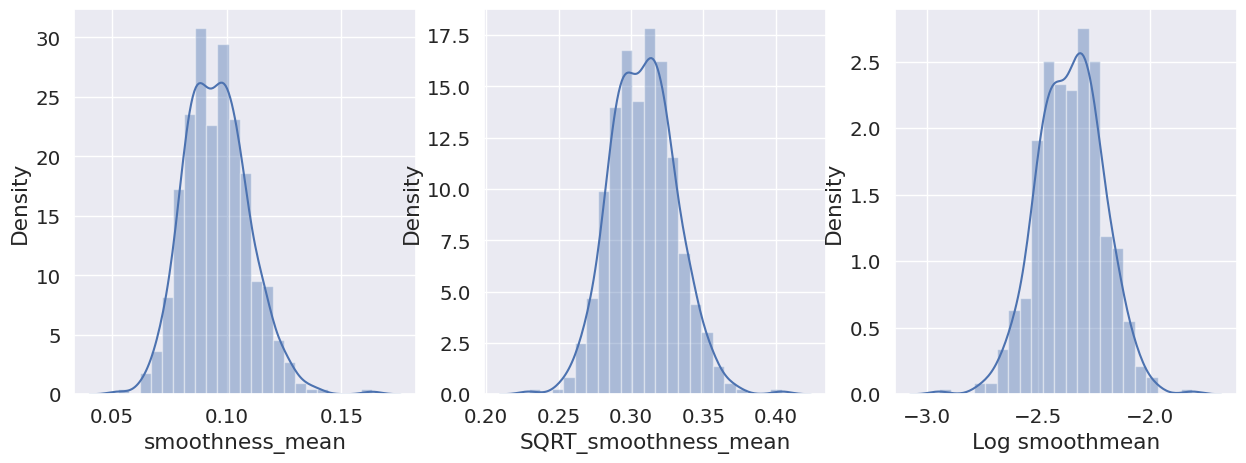

In [ ]:
fig, axes = plt.subplots(1,3,figsize=(15,5))

sns.distplot(df['smoothness_mean'], ax=axes[0])
sns.distplot(df['SQRT_smoothness_mean'], ax=axes[1])
sns.distplot(df['Log smoothmean'], ax=axes[2])

plt.show()

In [ ]:
Q11 = df.smoothness_mean.quantile(0.25)
Q22= df.smoothness_mean.quantile(0.50)
Q33 = df.smoothness_mean.quantile(0.75)

# IQR : Inter-Quartile Range

IQRR = Q33 - Q11

# Lower Limit:
LCC = Q11 - (1.5*IQRR)

# Upper Limit:
UCC = Q33 + (1.5*IQRR)

display(LCC)
display(UCC)

0.05650625000000001

0.13325625

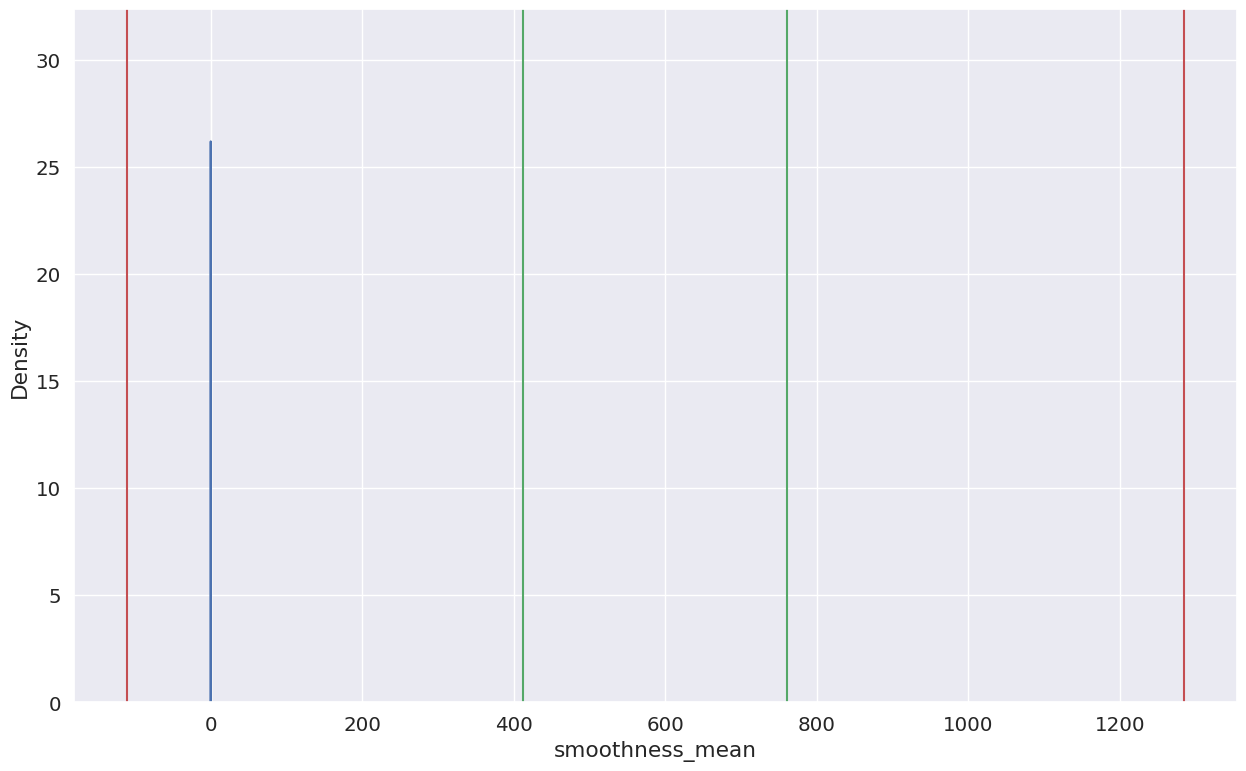

In [ ]:
sns.distplot(df.smoothness_mean)
plt.axvline(UC, color='r')
plt.axvline(LC, color ='r')
plt.axvline(Q1, color='g')
plt.axvline(Q3, color='g')
plt.show()

In [ ]:
df[(df.smoothness_mean<LC) | (df.smoothness_mean>UC)].reset_index(drop=True)

,diagnosis,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,SQRT_radius,Log radius,SQRT_texturemean,Log texturemean,SQRT_perimeter_mean,Log perimetermean,SQRT_areamean,Log areamean,SQRT_smoothness_mean,Log smoothmean


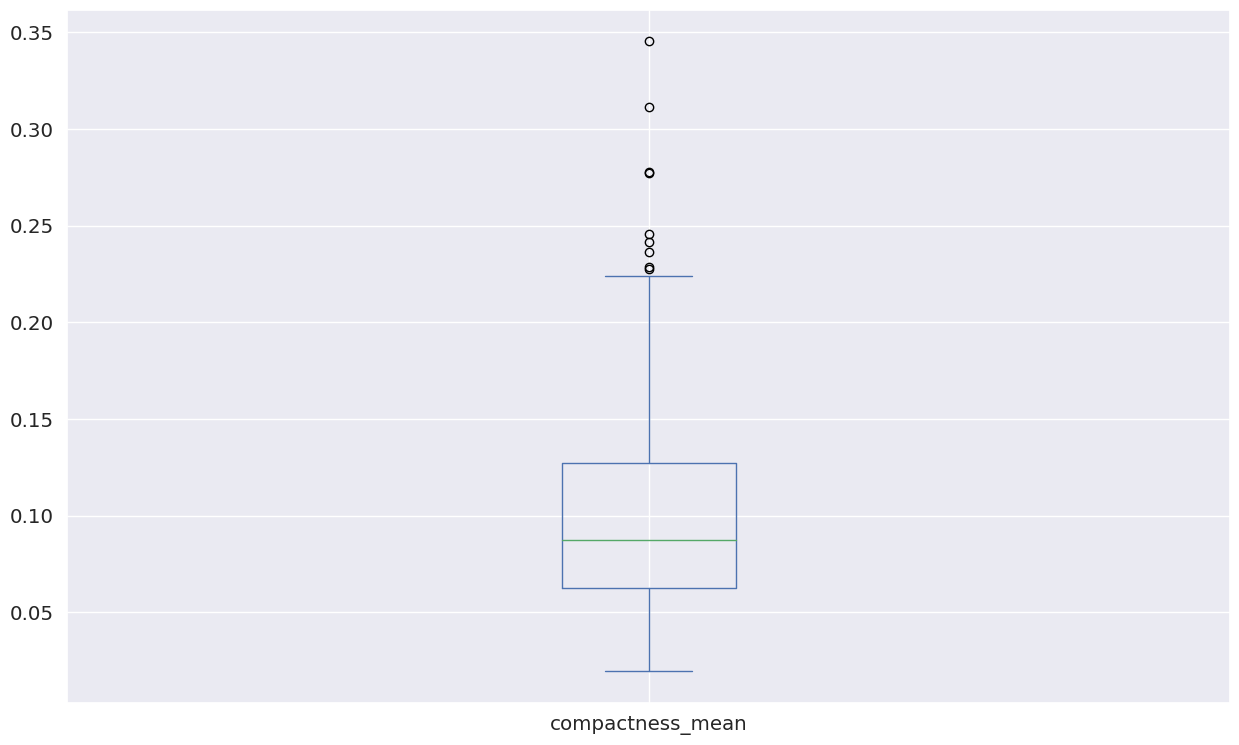

In [ ]:
df['compactness_mean'].plot(kind='box')
plt.show()


In [ ]:
df['SQRT_compactmean'] = df['compactness_mean']**0.5

In [ ]:
print("The skewness of the original data is {}".format(df.compactness_mean.skew()))
print('The skewness of the SQRT transformed data is {}'.format(df.SQRT_compactmean.skew()))

The skewness of the original data is 1.2667277829955046
The skewness of the SQRT transformed data is 0.5903658109966229


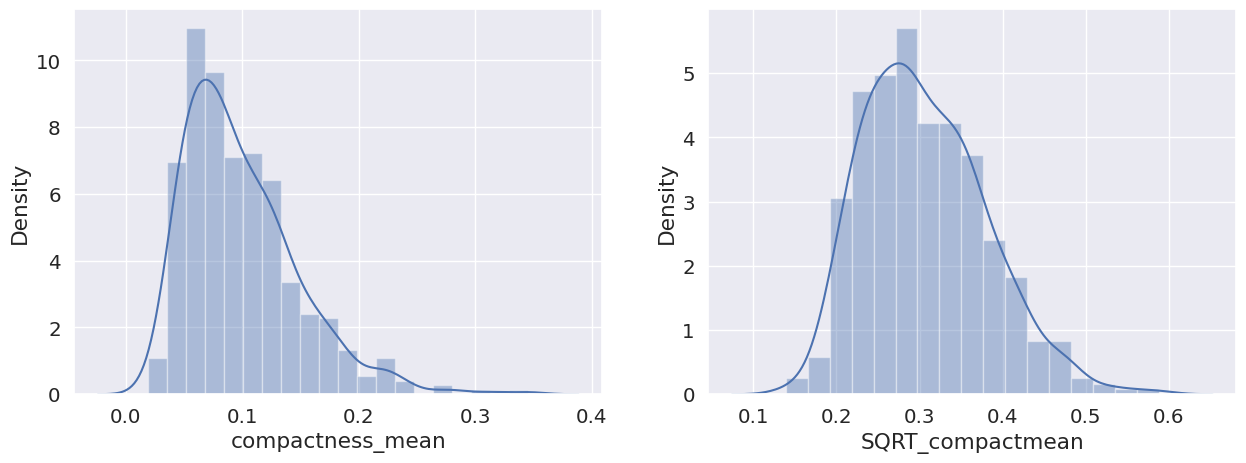

In [ ]:
fig,axes =plt.subplots(1,2,figsize=(15,5))
sns.distplot(df['compactness_mean'],ax=axes[0])
sns.distplot(df['SQRT_compactmean'],ax=axes[1])
plt.show()

In [ ]:
df['Log compactmean'] = np.log(df['compactness_mean'])

In [ ]:
print("The skewness of the original data is {}".format(df.compactness_mean.skew()))
print('The skewness of the SQRT transformed data is {}'.format(df.SQRT_compactmean.skew()))
print("The skewnss of the LOG transformed data is {}".format(df['Log compactmean'].skew()))


The skewness of the original data is 1.2667277829955046
The skewness of the SQRT transformed data is 0.5903658109966229
The skewnss of the LOG transformed data is -0.015263246166363861


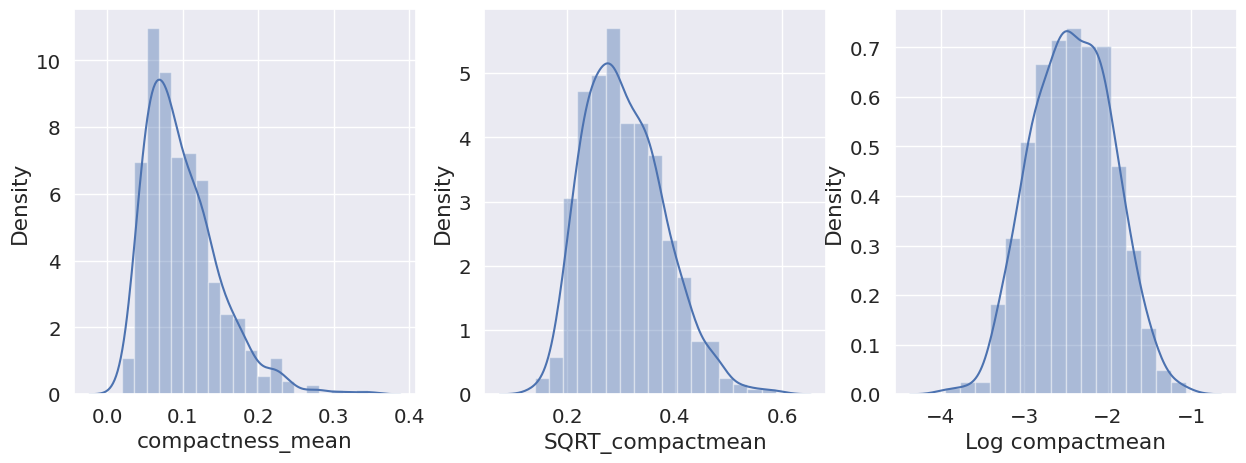

In [ ]:
fig, axes = plt.subplots(1,3,figsize=(15,5))

sns.distplot(df['compactness_mean'], ax=axes[0])
sns.distplot(df['SQRT_compactmean'], ax=axes[1])
sns.distplot(df['Log compactmean'], ax=axes[2])

plt.show()

In [ ]:
Q11 = df.compactness_mean.quantile(0.25)
Q22= df.compactness_mean.quantile(0.50)
Q33 = df.compactness_mean.quantile(0.75)

# IQR : Inter-Quartile Range

IQRR = Q33 - Q11

# Lower Limit:
LCC = Q11 - (1.5*IQRR)

# Upper Limit:
UCC = Q33 + (1.5*IQRR)

display(LCC)
display(UCC)

-0.03480625000000002

0.22396375000000002

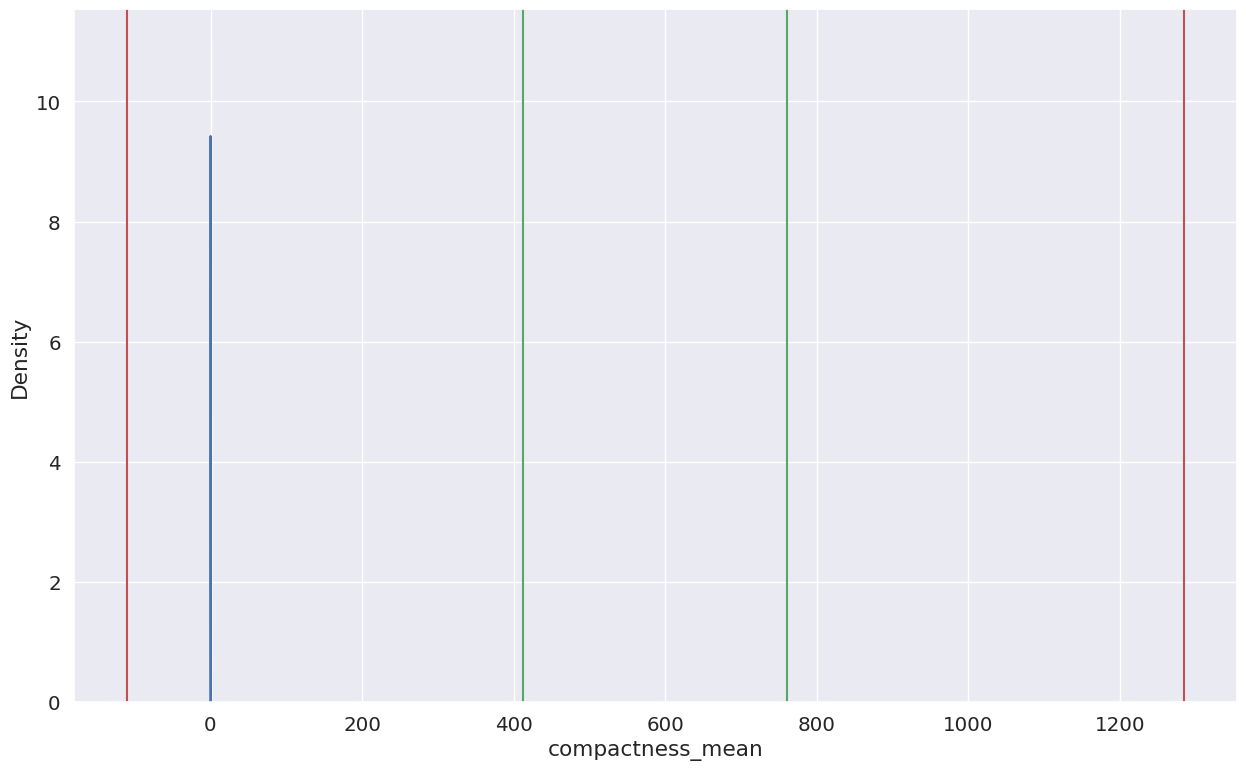

In [ ]:
sns.distplot(df.compactness_mean)
plt.axvline(UC, color='r')
plt.axvline(LC, color ='r')
plt.axvline(Q1, color='g')
plt.axvline(Q3, color='g')
plt.show()

In [ ]:
df[(df.compactness_mean<LC) | (df.compactness_mean>UC)].reset_index(drop=True)

,diagnosis,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,SQRT_texturemean,Log texturemean,SQRT_perimeter_mean,Log perimetermean,SQRT_areamean,Log areamean,SQRT_smoothness_mean,Log smoothmean,SQRT_compactmean,Log compactmean


In [ ]:
df

,diagnosis,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,SQRT_texturemean,Log texturemean,SQRT_perimeter_mean,Log perimetermean,SQRT_areamean,Log areamean,SQRT_smoothness_mean,Log smoothmean,SQRT_compactmean,Log compactmean
0,M,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,3.221801,2.339881,11.081516,4.810557,31.638584,6.908755,0.344093,-2.133687,0.526878,-1.281574
5,M,843786,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,3.962323,2.753661,9.086804,4.413646,21.842619,6.167726,0.357491,-2.057289,0.412311,-1.771957
6,M,844359,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,4.469899,2.994732,10.936178,4.784153,32.249031,6.946976,0.307620,-2.357781,0.330151,-2.216407
8,M,844981,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,4.671188,3.082827,9.354143,4.471639,22.799123,6.253444,0.356791,-2.061209,0.439545,-1.644029
10,M,845636,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,...,4.820788,3.145875,10.134101,4.631812,28.245354,6.681858,0.286461,-2.500305,0.258244,-2.707700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,B,925311,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,...,5.419410,3.379974,8.406545,4.258021,19.646883,5.955837,0.272929,-2.597090,0.188627,-3.335972
565,M,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,5.315073,3.341093,11.454257,4.876723,35.510562,7.139660,0.312730,-2.324831,0.321559,-2.269150
566,M,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,5.299057,3.335058,10.406729,4.684905,29.293344,6.754721,0.290775,-2.470412,0.319844,-2.279846
567,M,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,5.415718,3.378611,11.836385,4.942356,35.566838,7.142827,0.343220,-2.138767,0.526308,-1.283738


In [ ]:
X = df.iloc[:,-45:].values
Y = df.iloc[:, 0].values

In [ ]:
Y

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'B',
       'M', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B

In [ ]:
X

array([[ 8.42302000e+05,  1.79900000e+01,  1.03800000e+01, ...,
        -2.13368656e+00,  5.26877595e-01, -1.28157405e+00],
       [ 8.43786000e+05,  1.24500000e+01,  1.57000000e+01, ...,
        -2.05728874e+00,  4.12310563e-01, -1.77195684e+00],
       [ 8.44359000e+05,  1.82500000e+01,  1.99800000e+01, ...,
        -2.35778073e+00,  3.30151480e-01, -2.21640740e+00],
       ...,
       [ 9.26954000e+05,  1.66000000e+01,  2.80800000e+01, ...,
        -2.47041220e+00,  3.19843712e-01, -2.27984561e+00],
       [ 9.27241000e+05,  2.06000000e+01,  2.93300000e+01, ...,
        -2.13876701e+00,  5.26307895e-01, -1.28373777e+00],
       [ 9.27510000e+04,  7.76000000e+00,  2.45400000e+01, ...,
        -2.94446898e+00,  2.08854016e-01, -3.13223952e+00]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size = 0.25,shuffle = True ,random_state = 404)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((343, 45), (115, 45), (343,), (115,))

In [ ]:
y_test

array(['B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B'],
      dtype=object)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_train)
X_Test = sc_X.transform(X_test)
print(X_Train.shape)
print(X_Test.shape)

(343, 45)
(115, 45)


In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
# Predicting the test set results

Y_Pred = classifier.predict(X_test)

In [ ]:
# Making the Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_Pred)
show = pd.DataFrame(cm,columns=["yes","no"],index=["yes","no"])
show.head()

,yes,no
yes,76,2
no,4,33


In [ ]:
Y_Pred

array(['M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B'],
      dtype=object)

In [ ]:
print(classification_report(y_test,Y_Pred))

              precision    recall  f1-score   support

           B       0.95      0.97      0.96        78
           M       0.94      0.89      0.92        37

    accuracy                           0.95       115
   macro avg       0.95      0.93      0.94       115
weighted avg       0.95      0.95      0.95       115



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
conf_mat=confusion_matrix(y_test,pred)
print(conf_mat)

[[75  3]
 [15 22]]


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           B       0.83      0.96      0.89        78
           M       0.88      0.59      0.71        37

    accuracy                           0.84       115
   macro avg       0.86      0.78      0.80       115
weighted avg       0.85      0.84      0.83       115



In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC()

In [ ]:
model.fit(X_train,y_train)

SVC()

In [ ]:
predictions = model.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))

[[78  0]
 [37  0]]


In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           B       0.68      1.00      0.81        78
           M       0.00      0.00      0.00        37

    accuracy                           0.68       115
   macro avg       0.34      0.50      0.40       115
weighted avg       0.46      0.68      0.55       115



In [ ]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [ ]:
df['diagnosis']= df['diagnosis'].map({'M': 1 , 'B':0})

In [ ]:
X = df.iloc[:,-46:].values
Y = df['diagnosis'].values

In [ ]:
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,

In [ ]:
model=LinearRegression().fit(X, Y)

In [ ]:
print(model.coef_)

[ 1.00000000e+00 -7.38369110e-18  1.02173937e-09 -7.67037172e-10
 -7.69339024e-10  2.29396185e-11 -4.50603400e-10  1.83512138e-09
  1.96582213e-09  4.44552700e-09 -2.25001569e-09  1.19875897e-09
 -6.59520036e-09  8.25379578e-13  3.52158392e-10  4.10603821e-11
  2.05873670e-09  8.73807958e-10 -4.42257411e-09  2.54292631e-09
  6.16022957e-09 -1.91377876e-10  7.24674671e-10 -3.10446267e-11
 -1.98708279e-11 -4.72569556e-12 -1.57328015e-09 -4.06693250e-10
  7.68166137e-10 -2.69807463e-09 -8.11505336e-10  4.09242902e-09
  6.14015869e-14 -1.27231865e-11 -2.66357590e-09 -2.92067690e-09
  6.25133069e-09  1.89715883e-09  1.21625129e-08  4.58842738e-09
 -9.07696788e-10 -4.11904239e-09 -3.39142104e-10  7.26943078e-10
  4.89269350e-09 -1.09606936e-09]


In [ ]:
print(model.intercept_)

-5.3500945174089765e-08


In [ ]:
model.score(X, Y)

1.0